# **Author: Dr. Mohammad Javad Parseh (Jahrom University)**

## Image Enhancement

### Introduction

The filter enhances
the quality of an image so that important details can be visualized and quantified. In this chapter, we discuss a few more image enhancement techniques. These techniques transform the pixel values in the input image to a new value in the output image using a mapping function. We discuss logarithmic transformation, power law transformation, image inverse, histogram equalization, and contrast stretching.

### Pixel Transformation

A transformation is a function that maps a set of inputs to a set of outputs so that each input has exactly one output. In the case of images, a transformation takes the pixel intensities of the image as an input and creates a new image where the corresponding pixel intensities are defined by the transformation. Let us consider the transformation, ***T (x) = x + 50***. When this transformation is applied to an image, a value of 50 is added to the intensity of each pixel. The corresponding image is ***brighter*** than the input image.

True

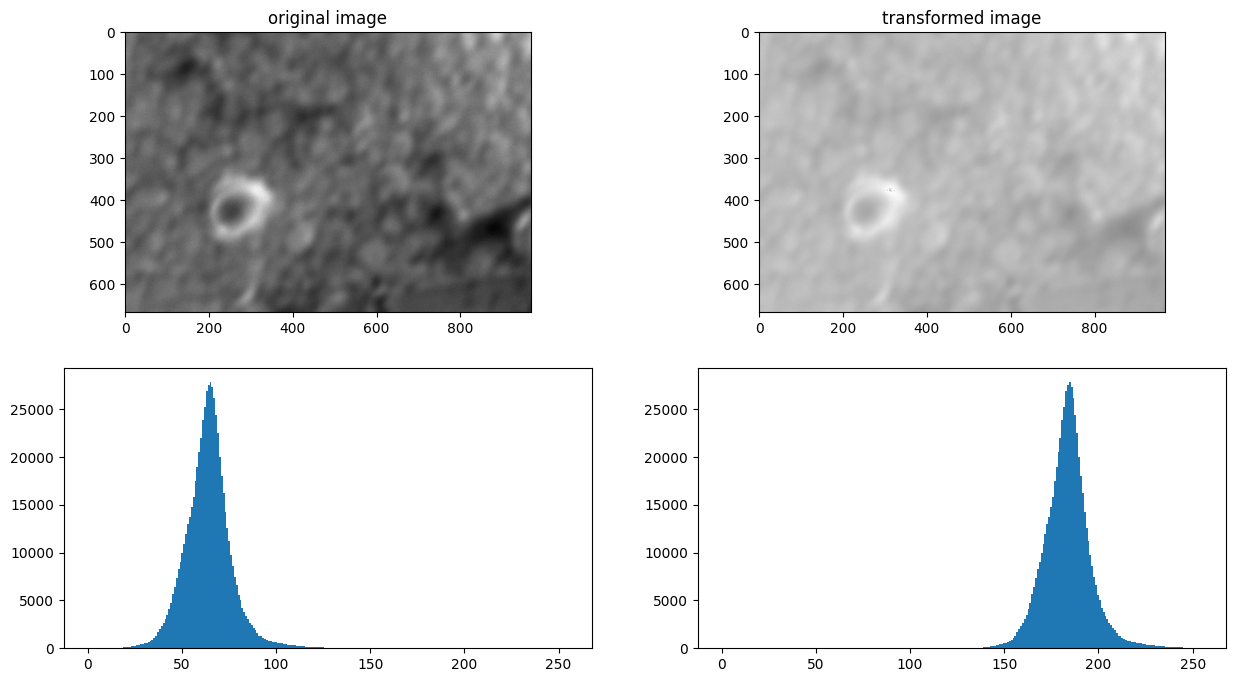

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
# Opening the image using cv2.
img = cv2.imread(os.path.join(base_path, 'images/sem2.png'))
# Converting the image to grayscale.
a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# T(x) = x + 120
b = a + 120

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

x = a.ravel()
plt.subplot(2,2,3)
plt.hist(x,256,[0,255])


plt.subplot(2,2,2)
plt.title('transformed image')
plt.imshow(b, 'gray')

x = b.ravel()
plt.subplot(2,2,4)
plt.hist(x,256,[0,255])


# Writing b to a file.
cv2.imwrite('transformed_output.png', b)

### Image Inverse

Image inverse transformation is a ***linear transformation***. The goal is to transform the dark intensities in the input image to bright intensities in the output image and vice versa.

True

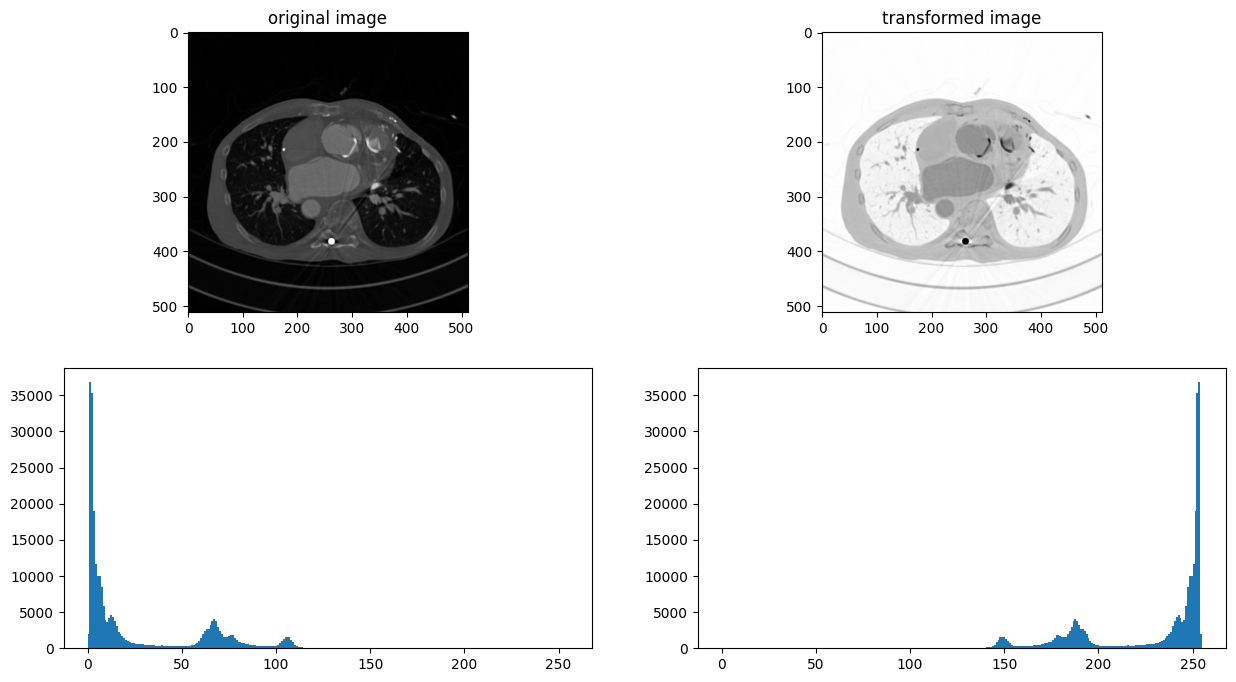

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Opening the image.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
# Opening the image using cv2.
img = cv2.imread(os.path.join(base_path, 'images/imageinverse_input.png'))
# Converting the image to grayscale.
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing the inversion operation
im2 = 255 - im

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(im, 'gray')

x = im.ravel()
plt.subplot(2,2,3)
plt.hist(x,256,[0,255])


plt.subplot(2,2,2)
plt.title('transformed image')
plt.imshow(im2, 'gray')

x = im2.ravel()
plt.subplot(2,2,4)
plt.hist(x,256,[0,255])

# Saving the image as imageinverse_output.png in Figures folder.
cv2.imwrite('imageinverse_output.png', im2)

### Power Law Transformation

***Power law transformation***, also known as ***gamma-correction***, is used to enhance the quality of the image. The human brain uses gamma-correction to process an image, hence gamma-correction is a built-in feature in devices that display, acquire, or publish images. Computer monitors and television screens have builtin gamma-correction so that the best image ***contrast*** is displayed in all the images.

<ipython-input-5-d4402d73aaa9>:23: RuntimeWarning: divide by zero encountered in log
  b41 = np.log(b2)*gamma1
<ipython-input-5-d4402d73aaa9>:24: RuntimeWarning: divide by zero encountered in log
  b42 = np.log(b2)*gamma2


(array([  605.,   222.,   315.,   468.,   506.,   520.,   591.,   526.,
          597.,   723.,   528.,   874.,   667.,   653.,   715.,   775.,
          807.,   899.,   474.,  1027.,   546.,  1139.,   607.,   607.,
         1287.,   656.,   668.,   706.,  1566.,   870.,   808.,   880.,
          975.,   934.,   961.,  1005.,  1022.,  1057.,  1117.,  1158.,
            0.,  1097.,  1164.,  1195.,  1310.,  1335.,     0.,  1331.,
         1388.,  1457.,     0.,  1522.,  1560.,     0.,  1561.,  1536.,
            0.,  1602.,  1579.,     0.,  1594.,  1514.,     0.,  1557.,
         1581.,     0.,  1497.,     0.,  1469.,     0.,  1554.,  1622.,
            0.,  1602.,     0.,  1626.,     0.,  1589.,     0.,  1661.,
            0.,  1628.,     0.,  1612.,     0.,  1582.,     0.,  1511.,
            0.,  1524.,     0.,     0.,  1543.,     0.,  1398.,     0.,
         1412.,     0.,  1335.,     0.,     0.,  1369.,     0.,  1401.,
            0.,     0.,  1430.,     0.,  1520.,     0.,     0., 

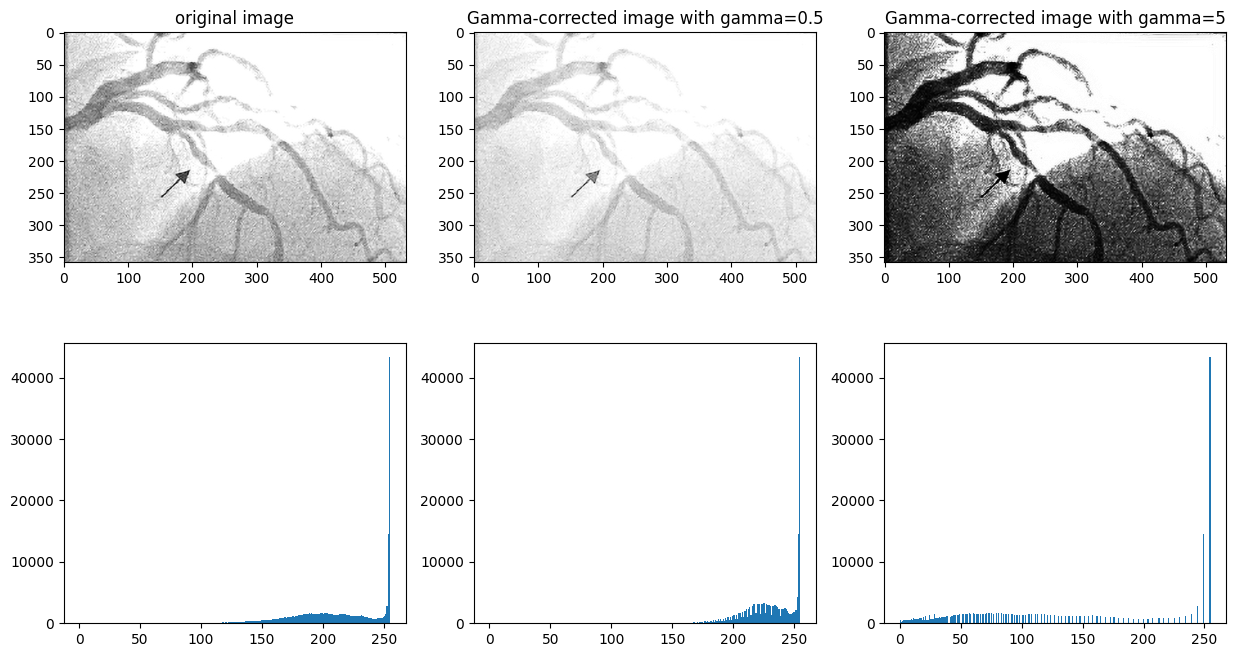

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Opening the image.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
# Opening the image using cv2.
img = cv2.imread(os.path.join(base_path, 'images/angiogram1.png'))
# Converting the image to grayscale.
a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# gamma is initialized.
gamma1 = 0.5
gamma2 = 5
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized
b2 = b1/b3
# gamma-correction exponent is computed.
b41 = np.log(b2)*gamma1
b42 = np.log(b2)*gamma2
# gamma-correction is performed.
c1 = np.exp(b41)*255.0
c2 = np.exp(b42)*255.0
# c is converted to type int.
c11 = c1.astype(int)
c12 = c2.astype(int)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.title('original image')
plt.imshow(a, 'gray')

x = a.ravel()
plt.subplot(2,3,4)
plt.hist(x,256,[0,255])

plt.subplot(2,3,2)
plt.title('Gamma-corrected image with gamma=0.5')
plt.imshow(c11, 'gray')

x = c11.ravel()
plt.subplot(2,3,5)
plt.hist(x,256,[0,255])

plt.subplot(2,3,3)
plt.title('Gamma-corrected image with gamma=5')
plt.imshow(c12, 'gray')

x = c12.ravel()
plt.subplot(2,3,6)
plt.hist(x,256,[0,255])

### Log Transformation

Log transformation is used to enhance pixel intensities that are otherwise missed due to a wide range of intensity values or lost at the expense of high-intensity values. Similar to the power law transformation with ***γ < 1***, the log transformation also maps a small range of dark or low-intensity pixel values in the input image to a wide range of intensities in the output image, while a wide range of bright or high-intensity pixel values in the input image get mapped to narrow range of high intensities in the output image.

True

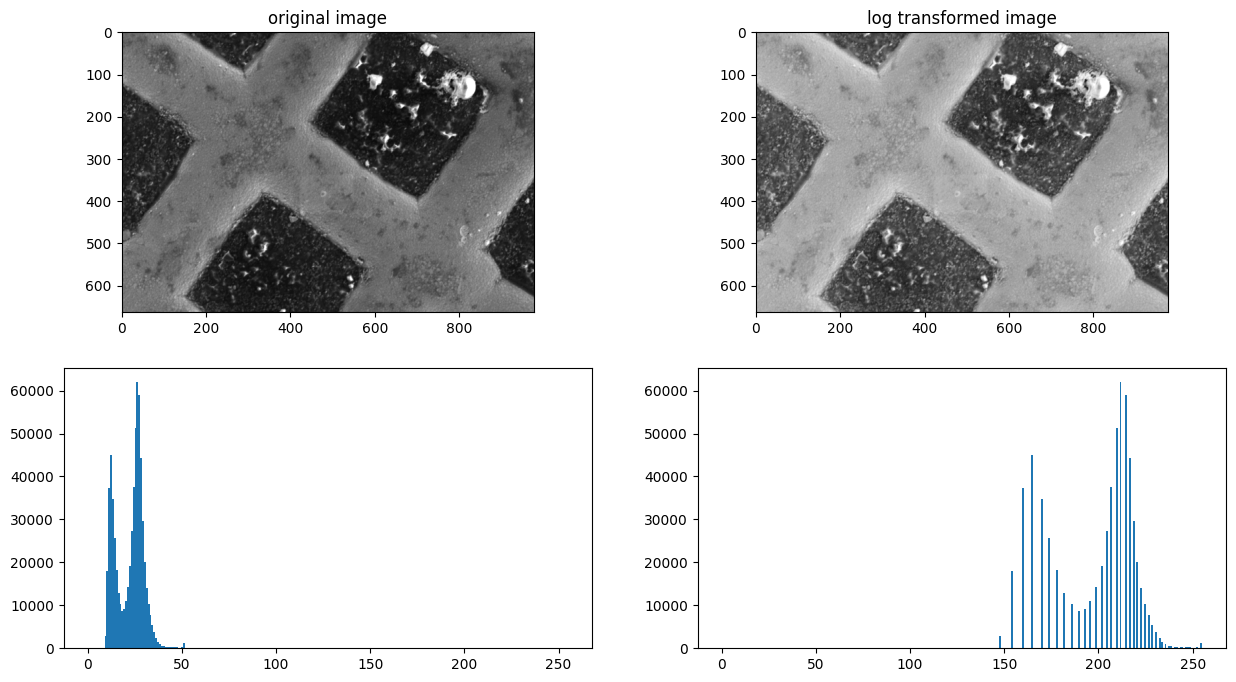

In [ ]:
import cv2
import numpy
import os
import matplotlib.pyplot as plt

# Opening the image.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
# Opening the image using cv2.
img = cv2.imread(os.path.join(base_path, 'images/bse.png'))
# Converting the image to grayscale.
a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# a is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b2 = numpy.max(b1)
# Performing the log transformation.
c = (255.0*numpy.log(1+b1))/numpy.log(1+b2)
# c is converted to type int.
c1 = c.astype(int)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

x = a.ravel()
plt.subplot(2,2,3)
plt.hist(x,256,[0,255])


plt.subplot(2,2,2)
plt.title('log transformed image')
plt.imshow(c1, 'gray')

x = c1.ravel()
plt.subplot(2,2,4)
plt.hist(x,256,[0,255])

# Saving c1 as logtransform_output.png.
cv2.imwrite('logtransform_output.png', c1)

### Histogram Equalization

In a low-contrast image, the histogram is narrow, whereas in an image with better contrast, the histogram is spread out. In histogram equalization, the goal is to ***improve the contrast*** of an image by rescaling the histogram so that the histogram of the new image is spread out and the pixel intensities range over all possible gray-level values. The rescaling of the histogram will be performed by using a transformation. To ensure that for every gray-level value in the input image there is a corresponding output, a one-to-one transformation is required; that is, every input has a unique output. This means the transformation should be a ***monotonic function***. This will ensure that the transformation is invertible.

True

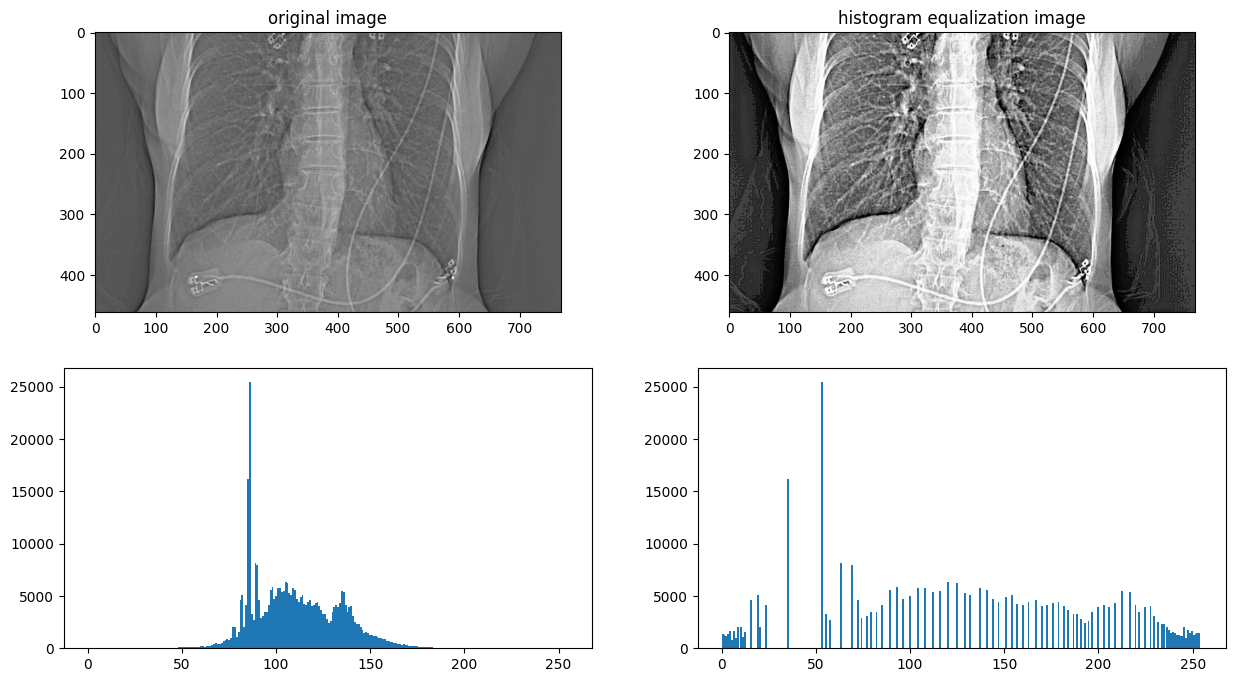

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Opening the image.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
# Opening the image using cv2.
img = cv2.imread(os.path.join(base_path, 'images/hequalization_input.png'))
# Converting the image to grayscale.
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2D array is converted to a 1D array.
fl = img1.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
im2 = cdf[fl]
# im2 is 1D so we use reshape command to make it into 2D.
im3 = np.reshape(im2,img1.shape)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(img1, 'gray')

x = img1.ravel()
plt.subplot(2,2,3)
plt.hist(x,256,[0,255])


plt.subplot(2,2,2)
plt.title('histogram equalization image')
plt.imshow(im3, 'gray')

x = im3.ravel()
plt.subplot(2,2,4)
plt.hist(x,256,[0,255])

# Saving im3 as hequalization_output.png in Figures folder
cv2.imwrite('hequalization_output.png', im3)

### Contrast Limited Adaptive Histogram Equalization (CLAHE)

Instead of using the histogram of the whole image, in Contrast Limited Adaptive Histogram Equalization, the image is divided into small regions and a histogram of each region is computed. A contrast limit is chosen as a threshold to clip the histogram in each bin, and the pixels above the threshold are not ignored but rather distributed to other bins before histogram equalization is applied.

True

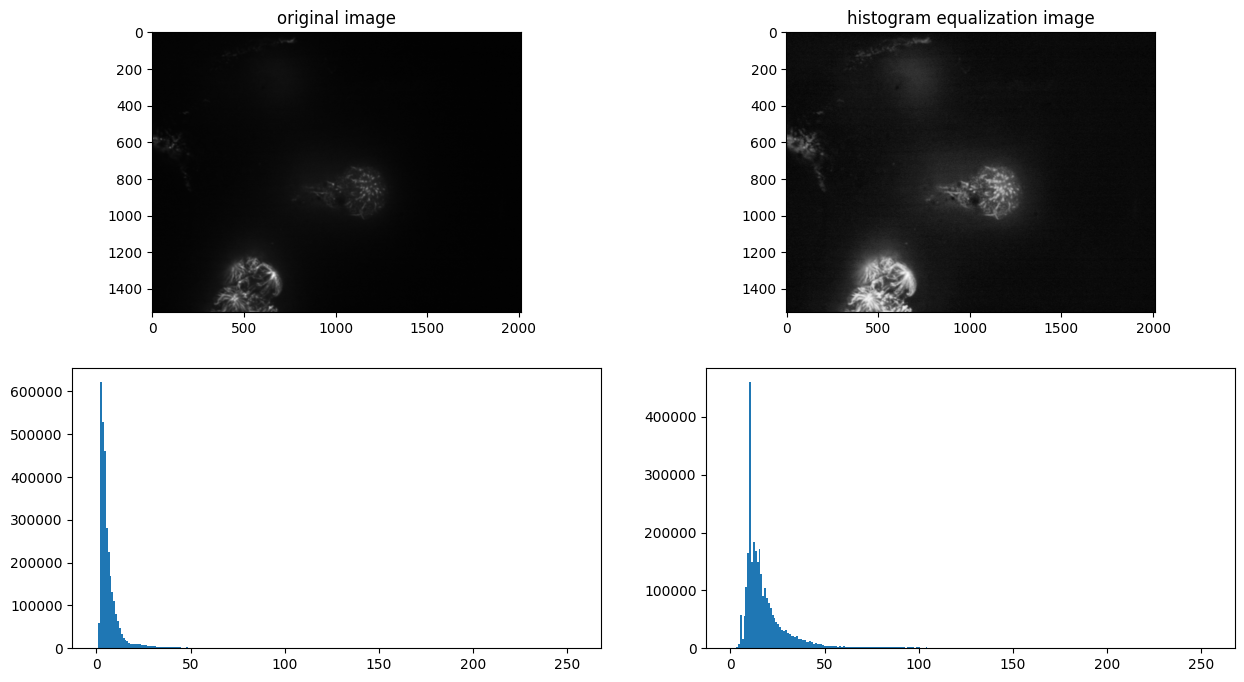

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.exposure import equalize_adapthist

# Opening the image.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
# Opening the image using cv2.
img = cv2.imread(os.path.join(base_path, 'images/embryo.png'))
# Converting the image to grayscale.
a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying Clahe.
img2 = equalize_adapthist(a, clip_limit = 0.02)
# Rescaling img2 from 0 to 255.
img3 = img2*255.0

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

x = a.ravel()
plt.subplot(2,2,3)
plt.hist(x,256,[0,255])


plt.subplot(2,2,2)
plt.title('adaptive histogram equalization image')
plt.imshow(img3, 'gray')

x = img3.ravel()
plt.subplot(2,2,4)
plt.hist(x,256,[0,255])

# Saving img3.
cv2.imwrite('clahe_output.png', img3)

### Contrast Stretching

Contrast stretching is similar in idea to histogram equalization except that the pixel intensities are rescaled using the pixel values instead of probabilities and CDF. Contrast stretching is used to increase the pixel value range by rescaling the pixel values in the input image. Consider an 8-bit image with a pixel value range of [a; b] where a > 0 and b < 255: If a is significantly greater than zero and if b is significantly smaller than 255, then the details in the image may not be visible. This problem can be offset by rescaling the pixel value range to [0; 255]; a
much larger pixel range.

7 51


True

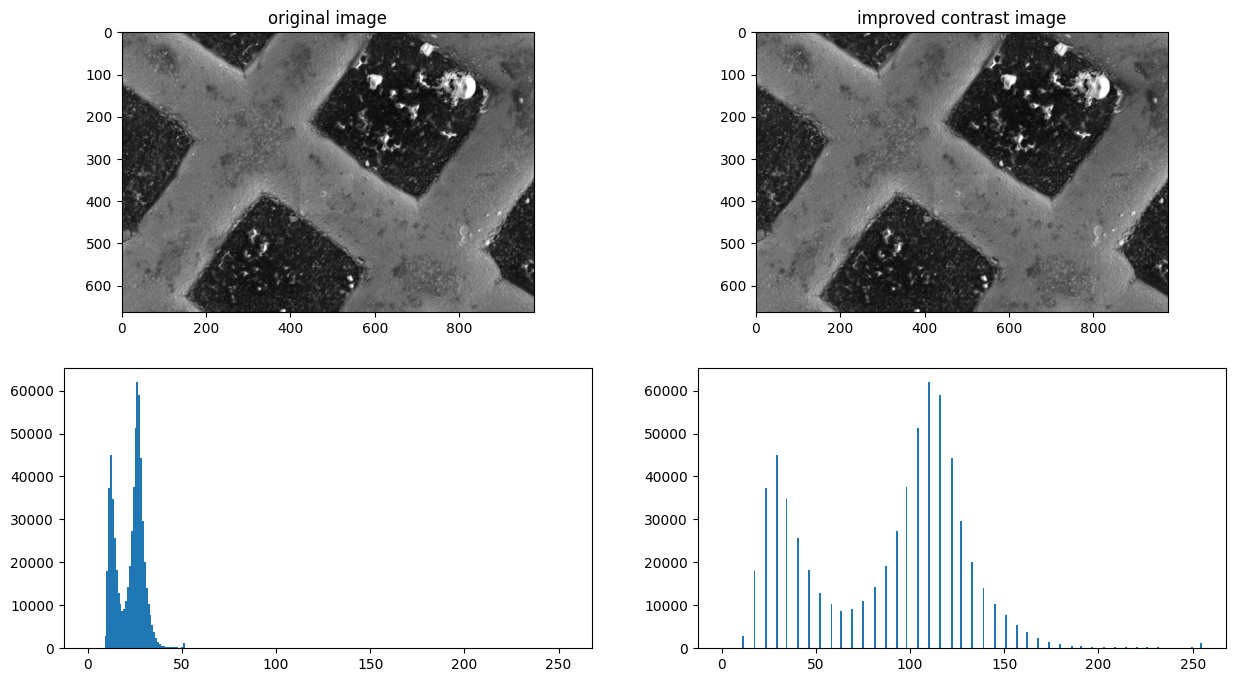

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Opening the image.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
# Opening the image using cv2.
img = cv2.imread(os.path.join(base_path, 'images/bse.png'))
# Converting the image to grayscale.
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Finding the maximum and minimum pixel values
b = im.max()
a = im.min()
print(a,b)
# Converting im1 to float.
c = im.astype(float)
# Contrast stretching transformation.
im1 = 255.0*(c-a)/(b-a+0.0000001)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(im, cmap='gray')


x = im.ravel()
plt.subplot(2,2,3)
plt.hist(x,256,[0,255])


plt.subplot(2,2,2)
plt.title('improved contrast image')
plt.imshow(im1, 'gray')

x = im1.ravel()
plt.subplot(2,2,4)
plt.hist(x,256,[0,255])

# Saving im2 as contrast_output.png in
# Figures folder
cv2.imwrite('contrast_output2.png', im1)

### Sigmoid Correction

True

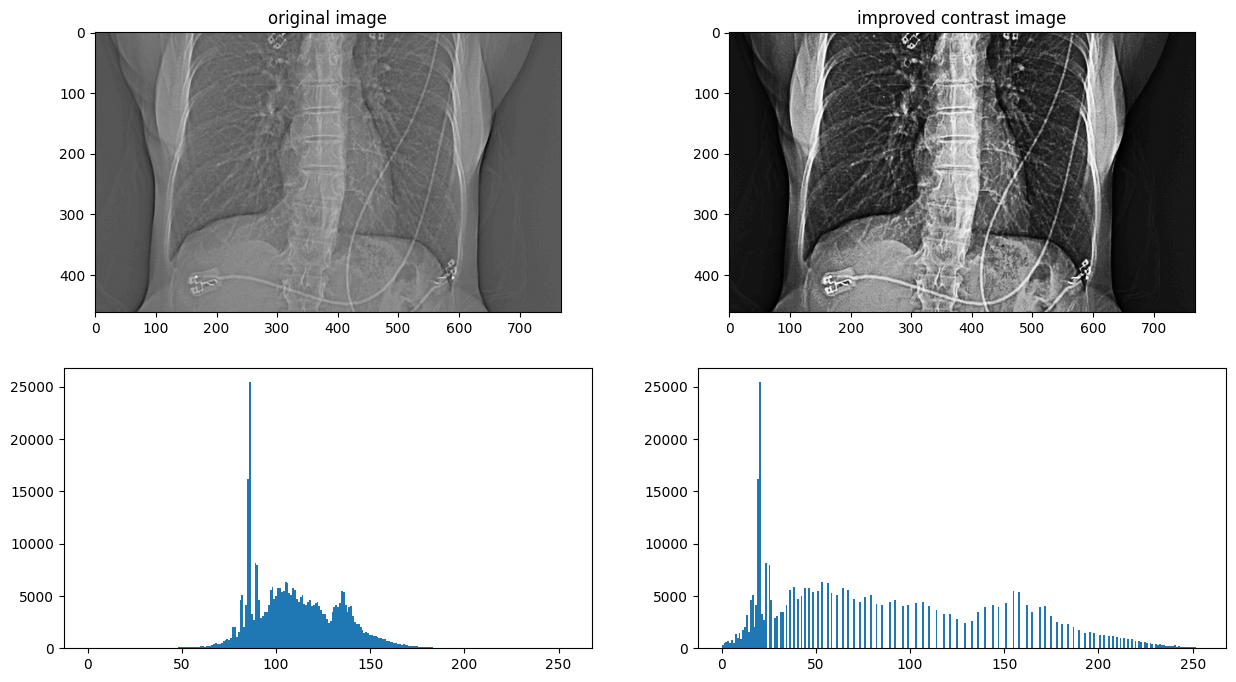

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.exposure import adjust_sigmoid

# Opening the image.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
# Opening the image using cv2.
img = cv2.imread(os.path.join(base_path, 'images/hequalization_input.png'))
# Converting the image to grayscale.
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying Sigmoid correction.
img2 = adjust_sigmoid(img1, gain=15, cutoff=0.5)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(img1, cmap='gray')


x = img1.ravel()
plt.subplot(2,2,3)
plt.hist(x,256,[0,255])


plt.subplot(2,2,2)
plt.title('improved contrast image')
plt.imshow(img2, 'gray')

x = img2.ravel()
plt.subplot(2,2,4)
plt.hist(x,256,[0,255])

# Saving img2.
cv2.imwrite('sigmoid_output.png', img2)

### Local Contrast Normalization

Local contrast normalization was developed as part of a computational neural model. The method demonstrates that enhancing the pixel value at a certain location depends only on its neighboring pixels and not the ones farther away from it. The method works by setting the local mean of a pixel to zero and its standard deviation to 1 based on the pixels in the neighborhood.

In [ ]:
!pip install pydicom

In [ ]:
import pydicom
import os
import numpy as np
import skimage.exposure as imexp
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from PIL import Image

def localfilter(im, sigma=(10, 10,)):
    im_gaussian = gaussian_filter(im, sigma=sigma[0])
    d = im_gaussian-im
    s = np.sqrt(gaussian_filter(d*d, sigma=sigma[1]))
    # form an array where all elements have a value of mean(s)
    mean_array = np.ones(s.shape)*np.mean(s)
    # find element by element maximum between mean_array and s
    max_array = np.maximum(mean_array, s)
    y = d/(max_array+np.spacing(1.0))
    return y

<ipython-input-5-e4da80b1b98e>:6: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


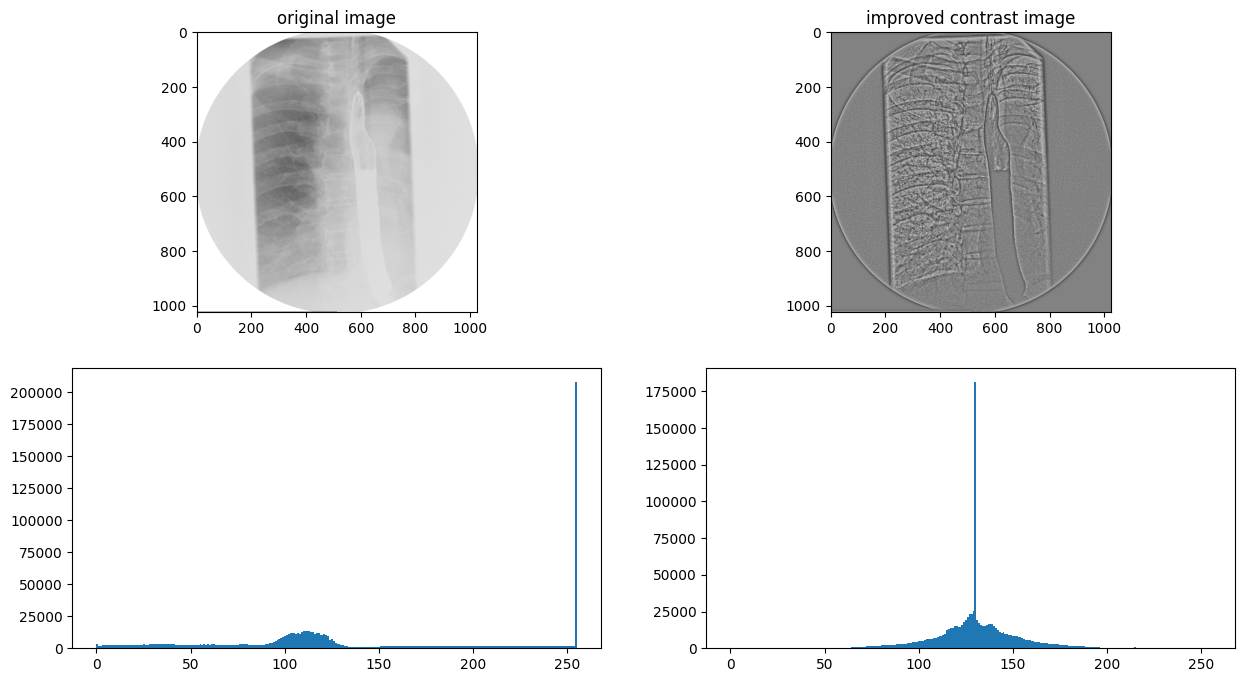

In [ ]:
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter05'
file_name = os.path.join(base_path, 'images/FluroWithDisplayShutter.dcm')
dfh = pydicom.dcmread(file_name, force=True)
im = dfh.pixel_array
im5 = im.astype(np.uint8)
# convert to float and scale before applying filter
im = im.astype(np.float64)
im1 = im/np.max(im)
sigma = (5, 5,)
im2 = localfilter(im, sigma)
# rescale to 8-bit
im3 = 255*(im2-im2.min())/(im2.max()-im2.min())
im4 = Image.fromarray(im3).convert("L")

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(im, cmap='gray')


x = im5.ravel()
plt.subplot(2,2,3)
plt.hist(x,256,[0,255])


plt.subplot(2,2,2)
plt.title('improved contrast image')
plt.imshow(im4, 'gray')

x = im3.ravel()
plt.subplot(2,2,4)
plt.hist(x,256,[0,255])

im4.save('local_normalization_output.png')